In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
# assign data-fields to variables 
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

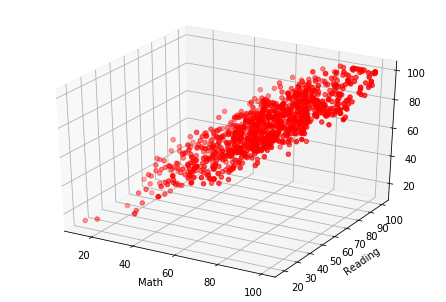

In [9]:
# Plot the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math,read,write,c = 'red')
plt.xlabel('Math')
plt.ylabel('Reading')
#plt.zlabel('Writing')
plt.show()

In [35]:
# variable declaration for Gradient descent
# X - predictor variables(Math,Reading)
# B- beata (intial coefficent values) - initialize to 0
# Y - Response variable -(Writitng)

l = len(math)
X = np.array([ math , read]).T
B = np.array([0 ,0])
Y = np.array(write)
alpha = 0.0001

In [46]:
# minimizing cost function

def cost_function(X,Y,B):
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * l)
    return J
initial_cost = cost_function(X,Y,B)
print("initial cost :",initial_cost)

def gradient_descent(X,Y,B,alpha,iterations):
    cost_history = [0] * iterations
    
    for i in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss)/ l
        B = B - alpha * gradient
        
        cost = cost_function(X,Y,B)
        cost_history[i] = cost 
    
    return B,cost_history

# for 100000 iterations
new_B , cost_history = gradient_descent(X,Y,B,alpha,10000)

print('New Coefficient')
print(new_B)

print('final cost')
print(cost_history[-1])

initial cost : 2470.11
New Coefficient
[0.0891154  0.89704474]
final cost
10.498705974432522


In [37]:
# model evaluation 

y_pred = X.dot(new_B)

def RMSE(Y, y_pred):
    rmse = np.sqrt(sum((Y - y_pred) **2/l))
    return rmse
def r2_score(Y,y_pred):
    mean_y = np.mean(Y)
    TSS = sum((Y - mean_y) ** 2)
    RSS = sum((Y - y_pred) ** 2)
    r2 = 1 - (RSS/TSS)
    return r2

print('RMSE :')
print(RMSE(Y ,y_pred))
print('R^2 Score :')
print(r2_score(Y ,y_pred))


RMSE :
4.582293306725907
R^2 Score :
0.9095190864276749
